# UTS (KLASIFIKASI ABSTRAK PTA)

## Read data PTA mentah

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# df = pd.read_excel('pta_mentah.xlsx')
df = pd.read_csv('https://raw.githubusercontent.com/HamedAyani114/dataset/main/Data_PTA_mentah.csv')
df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


In [ ]:
df.shape

(853, 5)

## Data Cleanning

### Eksplorasi data dan Cleaning

In [ ]:
df.isnull().sum()

NPM         0
Judul       6
Abstrak    25
Prodi       0
Label      43
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(810, 5)

In [ ]:
import re, string

# Cleaning
def cleaning(text):
    # Remove HTML tags
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub(' ', text)

    # Case folding
    text = (text.lower()) 

    # Trim text (Menghapus semua spasi dari teks kecuali spasi tunggal di antara kata-kata)
    text = text.strip()

    # Remove punctuations, special characters, and double whitespace
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)
    return text

In [ ]:
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))
df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))

In [ ]:
df.shape

(810, 5)

In [ ]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [ ]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(810, 5)

In [ ]:
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label
728,120411100015,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,Teknik Informatika,komputasi


In [ ]:
# Hapus data duplikat
df.drop_duplicates(subset=['Judul'], inplace=True)

# Apakah masih terdapat duplikasi pada kolom "Judul"?
df[df['Judul'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


In [ ]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [ ]:
df.shape

(809, 5)

### Tokenization

In [ ]:
import nltk
nltk.download('popular')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
df.shape

(809, 5)

In [ ]:
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df['abstrak_tokens']

0      [sistem, informasi, akademik, siakad, merupaka...
1      [berjalannya, koneksi, jaringan, komputer, den...
2      [web, server, adalah, sebuah, perangkat, lunak...
3      [penjadwalan, kuliah, di, perguruan, tinggi, m...
4      [seiring, perkembangan, teknologi, yang, ada, ...
                             ...                        
848    [investasi, saham, selama, ini, memiliki, resi...
849    [information, retrieval, ir, merupakan, pengam...
850    [klasifikasi, citra, merupakan, proses, pengel...
851    [identifikasi, atribut, pejalan, kaki, merupak...
852    [topik, deteksi, objek, telah, menarik, perhat...
Name: abstrak_tokens, Length: 809, dtype: object

### Stopword

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

In [ ]:
df['abstrak_tokens']=df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

### Stemming

In [ ]:
!pip install Sastrawi --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 6.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
df['abstrak_tokens']=df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

100%|██████████| 809/809 [07:11<00:00,  1.88it/s]


## export data bersih

In [ ]:
df['abstrak_tokens']=df['abstrak_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# df.to_csv('DataOlah_Pta_cleanbaru.csv', index=False)

## Read data bersih PTA prepo

In [3]:
dfnw=pd.read_csv('https://raw.githubusercontent.com/HamedAyani114/dataset/main/DataOlah_Pta_clean.csv')
dfnw.head()

,Unnamed: 0,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens
0,0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,"['perancangan', 'implementasi', 'sistem', 'dat...",sistem informasi akademik siakad sistem inform...
1,1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"['aplikasi', 'kontrol', 'monitoring', 'jaringa...",jalan koneksi jaring komputer lancar ganggu ha...
2,2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"['rancang', 'bangun', 'aplikasi', 'proxy', 'se...",web server perangkat lunak server berfungsimen...
3,3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,"['sistem', 'pendukung', 'keputusan', 'optimasi...",jadwal kuliah guru kompleks masalah variabel t...
4,4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"['sistem', 'augmented', 'reality', 'animasi', ...",iring kembang teknologi dunia muncul teknologi...


In [4]:
dfnw['Label'].value_counts()

komputasi    572
RPL          198
PBA           39
Name: Label, dtype: int64

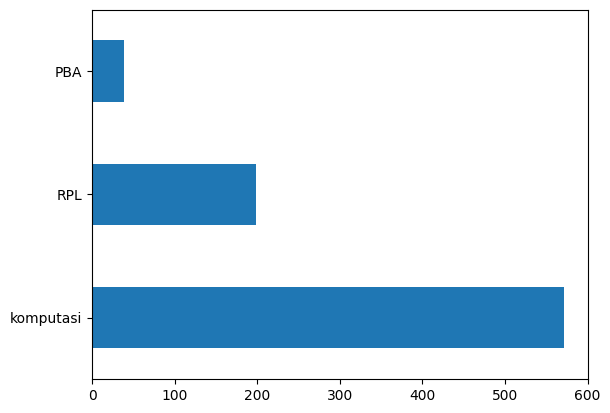

In [5]:
# Distribusi Kelas
dfnw['Label'].value_counts().plot(kind='barh')
plt.show()

In [7]:
X = dfnw['abstrak_tokens']
y = dfnw['Label']
# X_array=dfnw['abstrak_tokens'].apply(lambda x: word_tokenize(x))

## Pembobotan Kata

### Word2Vec

In [ ]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

In [ ]:
# Word2Vec modeling. 
# model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model_X_word2vec = Word2Vec(sentences=X_array, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
model_X_word2vec.predict_output_word("abjad")

[('x', 0.00022338174),
 ('c', 0.00018961739),
 ('baik', 0.00017294916),
 ('huruf', 0.00017141516),
 ('menggunka', 0.00017073861),
 ('means', 0.00017066435),
 ('penjadwaln', 0.00017020087),
 ('k', 0.00016951741),
 ('bahasa', 0.00016903484),
 ('madura', 0.00016851537)]

### TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(X) 
X_countvector = count_vectorizer.fit_transform(X)

In [9]:
terms_tfidf = tfidf_vectorizer.get_feature_names_out()
terms_countvector = count_vectorizer.get_feature_names_out()

sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms_tfidf):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

                       term       rank
5376                 sistem  32.339549
1173                   data  28.965659
939                   citra  28.863548
3609                 metode  28.713771
2085                  hasil  27.121133
...                     ...        ...
3887  numberabstrakberbagai   0.051212
2479        jarimenggunakan   0.051212
5160                seirver   0.040808
264                analyzer   0.040808
6364              wireshark   0.040808

[6442 rows x 2 columns]


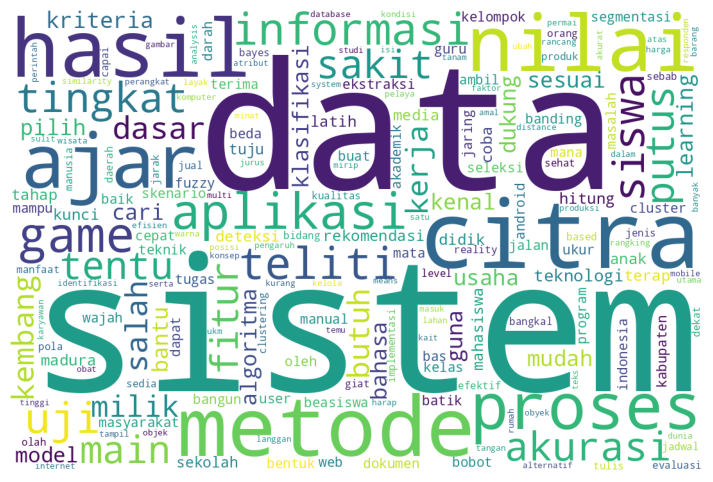

In [10]:
# plot to wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', width=1080, height=720).generate_from_frequencies(dict(zip(ranking['term'], ranking['rank'])))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Reduksi Dimensi

In [11]:
print("shape X_tfidf :", X_tfidf.shape)
# print("shape X_countvector :", X_countvector.shape)

shape X_tfidf : (809, 6442)


In [12]:
X_tfidf_array=X_tfidf.toarray()
X_tfidf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_tfidf_array.shape

(809, 6442)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_tfidf_pca = pca.fit_transform(X_tfidf_array)

In [16]:
X_tfidf_pca.shape

(809, 100)

## Split Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_pca, y, test_size=0.25, random_state=42)

## Model

### Model Naive Bayes

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print('Accuracy score : ', accuracy_score(y_test, y_pred_gnb))
print('Precision score : ', precision_score(y_test, y_pred_gnb, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred_gnb, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred_gnb, average='weighted'))

Accuracy score :  0.8078817733990148
Precision score :  0.8395731765863919
Recall score :  0.8078817733990148
F1 score :  0.8170343704826465


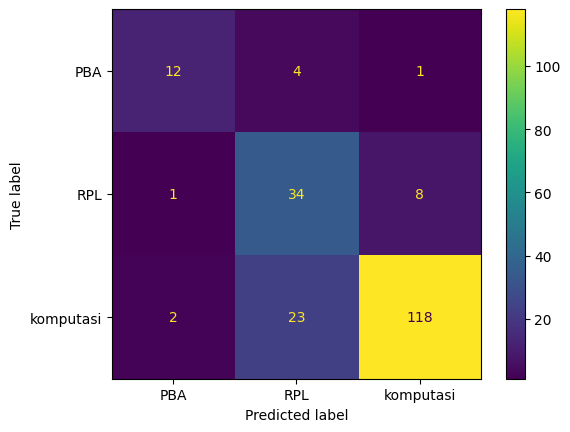

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb)
plt.show()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         PBA       0.80      0.71      0.75        17
         RPL       0.56      0.79      0.65        43
   komputasi       0.93      0.83      0.87       143

    accuracy                           0.81       203
   macro avg       0.76      0.77      0.76       203
weighted avg       0.84      0.81      0.82       203



### Model KNN

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print('Accuracy score : ', accuracy_score(y_test, y_pred_knn))
print('Precision score : ', precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred_knn, average='weighted'))

Accuracy score :  0.8374384236453202
Precision score :  0.8382830022455415
Recall score :  0.8374384236453202
F1 score :  0.8350286669810709


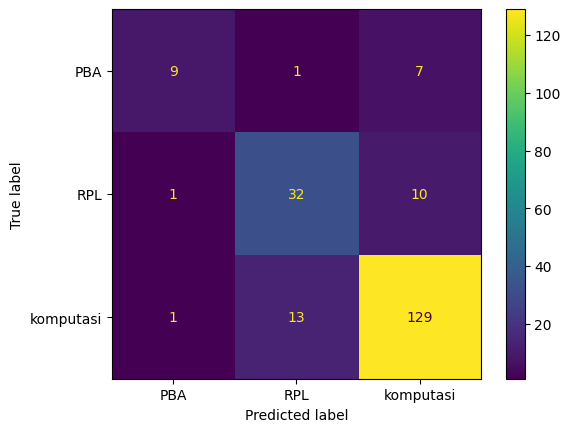

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         PBA       0.82      0.53      0.64        17
         RPL       0.70      0.74      0.72        43
   komputasi       0.88      0.90      0.89       143

    accuracy                           0.84       203
   macro avg       0.80      0.73      0.75       203
weighted avg       0.84      0.84      0.84       203



Tes Model

In [ ]:
# str_abstrak = input("Masukkan Abstraksi:\n")

# hasil = dtc.predict(tfidf_vectorizer.transform([str_abstrak]))

# print("Klasifikasi topik: " + "".join(hasil))

## Export Model

In [ ]:
# from joblib import dump
# dump(gnb, filename="pta-tfidf_pca_gnb-model.joblib")